In [1]:
%matplotlib inline

In [2]:
import os
home_folder = os.path.expanduser("~")
print(home_folder)
my_file_full_path=os.path.join(home_folder,"Data","ionosphere.data")
print(my_file_full_path)

/Users/neely
/Users/neely/Data/ionosphere.data


In [3]:
# Change this to the location of your dataset
data_filename = "/Users/neely/Data/ionosphere.data"
data_filename = "ionosphere.data"
print(data_filename)

ionosphere.data


In [8]:
import csv
import numpy as np

# Creates array of zeros for csv file input, places into x and y
# Size taken from the dataset and is known already
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

In [9]:
#from sklearn.cross_validation import train_test_split
#splits training dataset randomly into training and testing data, and prints num of features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Looks for the nearest neighbords, called estimator
estimator = KNeighborsClassifier()

KNeighborsClassifier()


In [11]:
print(len(y_train)) #training - samples
print(X_train.shape) #features - shape

263
(263, 34)


In [12]:
#trains data based on k classifier
#returns max num of neighbors to use?
estimator.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# determines the accuracy of prediction basted on comparison between training and test data
y_predicted = estimator.predict(X_test)
# finds the num of matches to find accuracy
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
# evaluate a score by cross-validation - cv= num of folds
scores = cross_val_score(estimator, X, y, scoring='accuracy',cv=5)
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.6%


In [16]:
# runs cross-validataion for each k value, finding their accuracy
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy',cv=5)
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [18]:
print(avg_scores)

[0.8432997987927566, 0.8718712273641852, 0.8318712273641851, 0.8432997987927567, 0.8261971830985916, 0.8375855130784708, 0.8204828973843059, 0.8290140845070424, 0.8232997987927566, 0.8375452716297787, 0.8289738430583501, 0.8432595573440643, 0.8290543259557344, 0.8404024144869215, 0.8318712273641851, 0.8432595573440643, 0.8347283702213281, 0.8375855130784708, 0.8261569416498993, 0.8404426559356135]


In [15]:
# documentation for plot
plt.plot?

Object `plt.plot` not found.


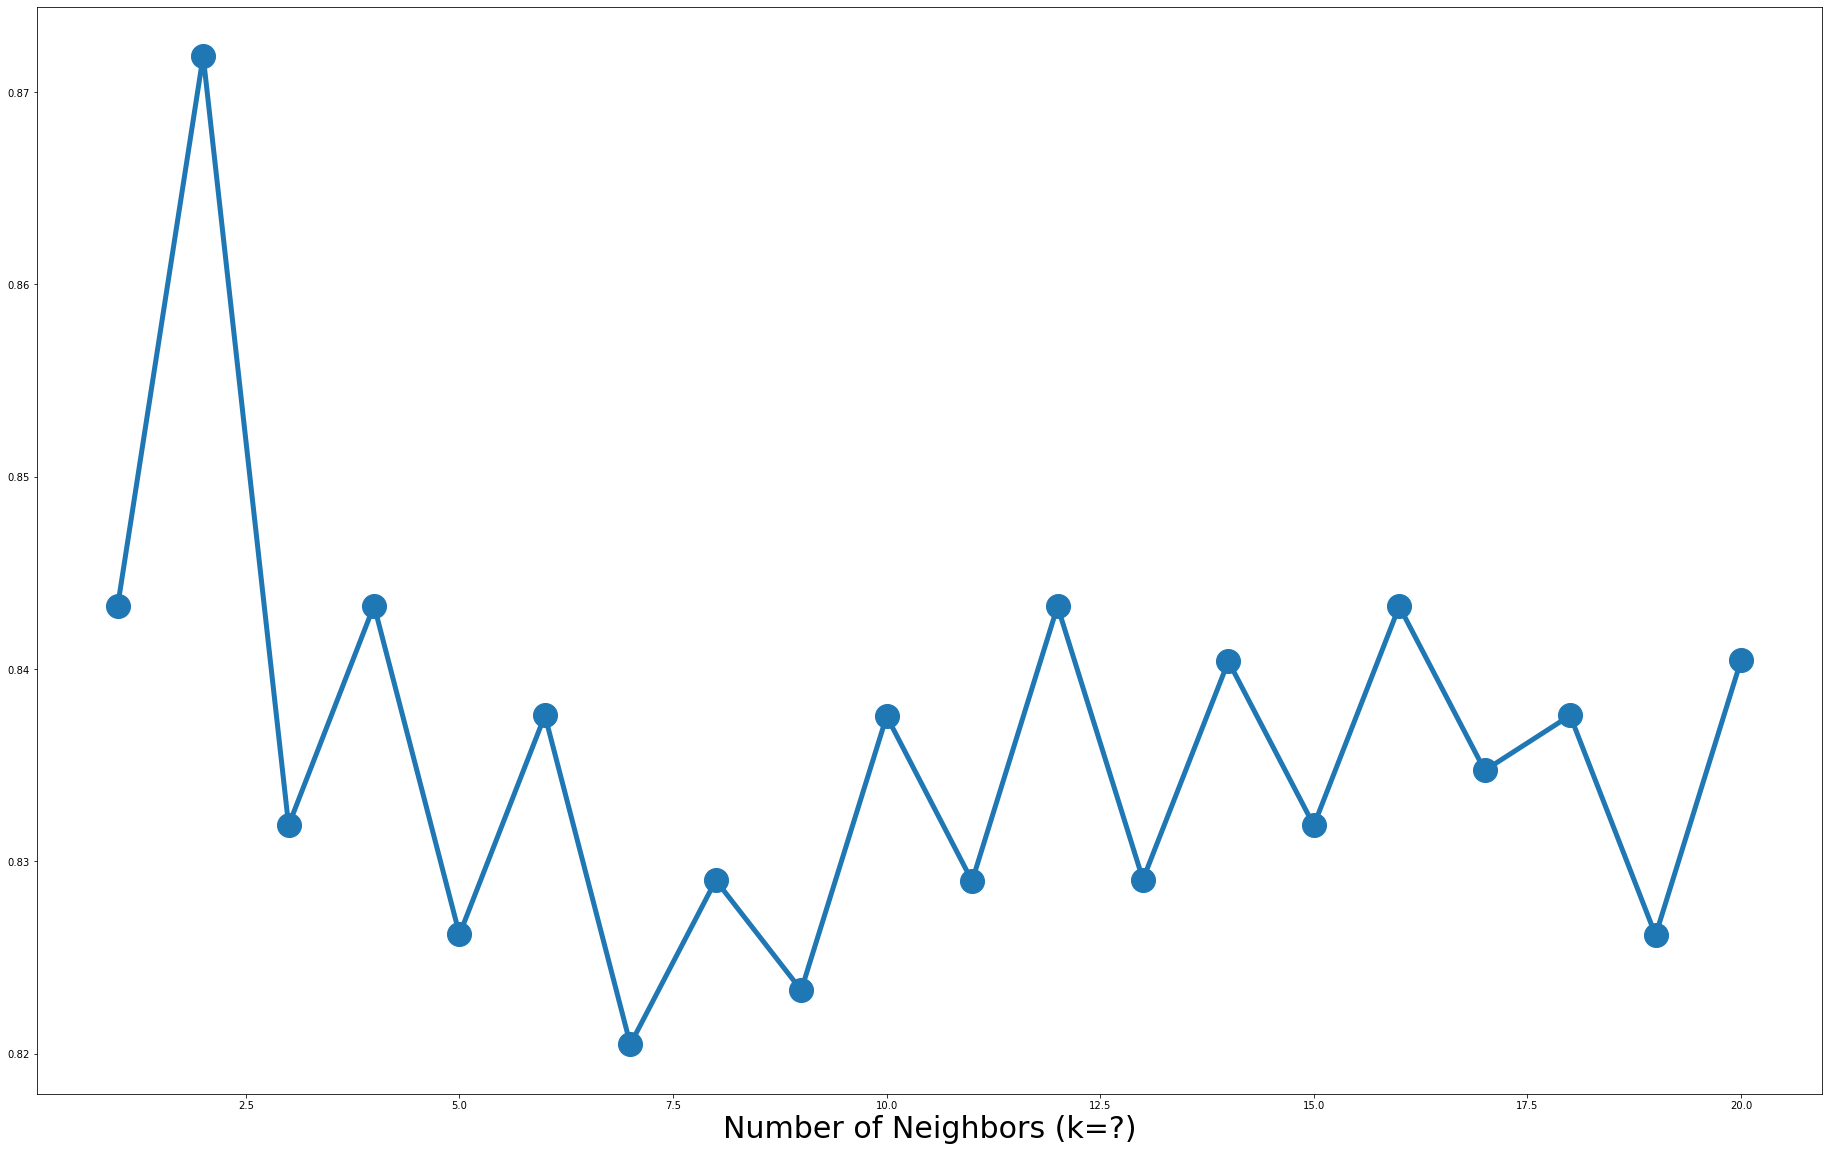

In [16]:
from matplotlib import pyplot as plt
# accuracy based on the number of neighbors - k
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])
plt.xlabel('Number of Neighbors (k=?)',fontsize=30)
plt.rc('xtick',labelsize=30)

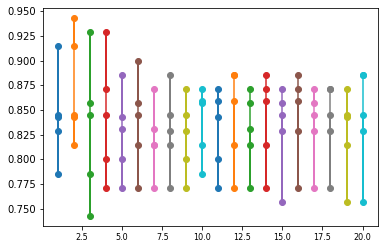

In [17]:
# print(parameter_values)
# print(all_scores)
# parameter_values - k values up to 20
# all_scores - 5 different validation scores for each given k value
plt.rc('xtick',labelsize=8)
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

In [ ]:
# similar to above, instead of lines, x 
plt.plot(parameter_values, all_scores, 'bx')

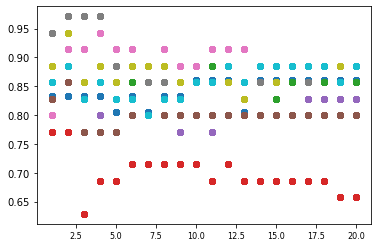

In [19]:
# ten splits for cross-validation
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

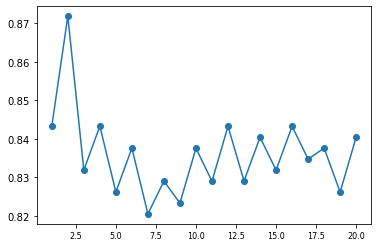

In [20]:
plt.plot(parameter_values, avg_scores, '-o')

In [21]:
X_broken = np.array(X)

In [1]:
# X_broken[:,::2] /= 10
X_broken[:,::5] /= 10

NameError: name 'X_broken' is not defined

In [22]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,
  scoring='accuracy',cv=5)
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y,
  scoring='accuracy',cv=5)
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))


The original average accuracy for is 82.6%
The 'broken' average accuracy for is 73.8%


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
X_transformed = MinMaxScaler().fit_transform(X)

In [25]:
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, 
  scoring='accuracy',cv=5)
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The average accuracy for is 82.9%


In [26]:
from sklearn.pipeline import Pipeline

In [39]:
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                             ('predict', KNeighborsClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('predict', KNeighborsClassifier())])


In [28]:
scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy',cv=5)
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The pipeline scored an average accuracy for is 82.9%


In [29]:
X_transformed[:6,:6]

array([[1.      , 0.      , 0.997695, 0.470555, 0.926215, 0.51153 ],
       [1.      , 0.      , 1.      , 0.405855, 0.965175, 0.31922 ],
       [1.      , 0.      , 1.      , 0.483175, 1.      , 0.502425],
       [1.      , 0.      , 1.      , 0.274195, 1.      , 1.      ],
       [1.      , 0.      , 1.      , 0.487995, 0.9707  , 0.532655],
       [1.      , 0.      , 0.511685, 0.49704 , 0.45038 , 0.440255]])

In [30]:
X_broken[:6,:6]

array([[ 0.1     ,  0.      ,  0.099539, -0.05889 ,  0.085243,  0.02306 ],
       [ 0.1     ,  0.      ,  0.1     , -0.18829 ,  0.093035, -0.36156 ],
       [ 0.1     ,  0.      ,  0.1     , -0.03365 ,  0.1     ,  0.00485 ],
       [ 0.1     ,  0.      ,  0.1     , -0.45161 ,  0.1     ,  1.      ],
       [ 0.1     ,  0.      ,  0.1     , -0.02401 ,  0.09414 ,  0.06531 ],
       [ 0.1     ,  0.      ,  0.002337, -0.00592 , -0.009924, -0.11949 ]])

In [31]:
X[:6,:6]

array([[ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306],
       [ 1.     ,  0.     ,  1.     , -0.18829,  0.93035, -0.36156],
       [ 1.     ,  0.     ,  1.     , -0.03365,  1.     ,  0.00485],
       [ 1.     ,  0.     ,  1.     , -0.45161,  1.     ,  1.     ],
       [ 1.     ,  0.     ,  1.     , -0.02401,  0.9414 ,  0.06531],
       [ 1.     ,  0.     ,  0.02337, -0.00592, -0.09924, -0.11949]])

In [32]:
X_rand=np.random.rand(X.shape[0],1)